# **Stock Price Prediction**

In [1]:
!pip install -q yfinance

In [2]:
!pip install --upgrade wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.6 MB/s eta 0:00:0000:01
  Attempting uninstall: wandb
    Found existing installation: wandb 0.15.5
    Uninstalling wandb-0.15.5:
      Successfully uninstalled wandb-0.15.5


In [3]:
import wandb

try:
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    api_key = user_secrets.get_secret("wandb_api")
    wandb.login(key=api_key)
    anony = None
except:
    anony = "must"
    print('If you want to use your W&B account, go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as wandb_api. \nGet your W&B access token from here: https://wandb.ai/authorize')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-01-03,149.199997,151.050003,148.330002,148.470001,148.470001,49425500,AMAZON
2024-01-04,145.589996,147.380005,144.050003,144.570007,144.570007,56039800,AMAZON
2024-01-05,144.690002,146.589996,144.529999,145.240005,145.240005,45124800,AMAZON
2024-01-08,146.740005,149.399994,146.149994,149.100006,149.100006,46757100,AMAZON
2024-01-09,148.330002,151.710007,148.210007,151.369995,151.369995,43812600,AMAZON
2024-01-10,152.059998,154.419998,151.880005,153.729996,153.729996,44421800,AMAZON
2024-01-11,155.039993,157.169998,153.119995,155.179993,155.179993,49072700,AMAZON
2024-01-12,155.389999,156.199997,154.009995,154.619995,154.619995,40460300,AMAZON
2024-01-16,153.529999,154.990005,152.149994,153.160004,153.160004,41384600,AMAZON


In [5]:
color_pal=sns.color_palette()
color_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

/tmp/ipykernel_32/1060887869.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


<Figure size 1500x1200 with 0 Axes>

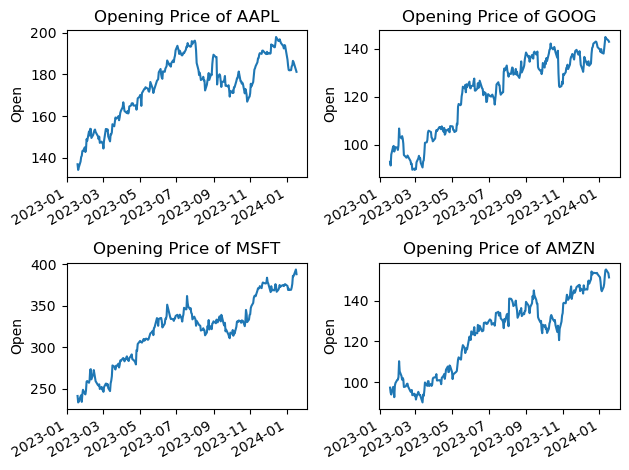

In [6]:
plt.figure(figsize=(15, 12))
plt.subplots()

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Open'].plot()
    plt.ylabel('Open')
    plt.xlabel(None)
    plt.title(f"Opening Price of {tech_list[i - 1]}")
    
plt.tight_layout()

/tmp/ipykernel_32/4014114630.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


<Figure size 1500x1200 with 0 Axes>

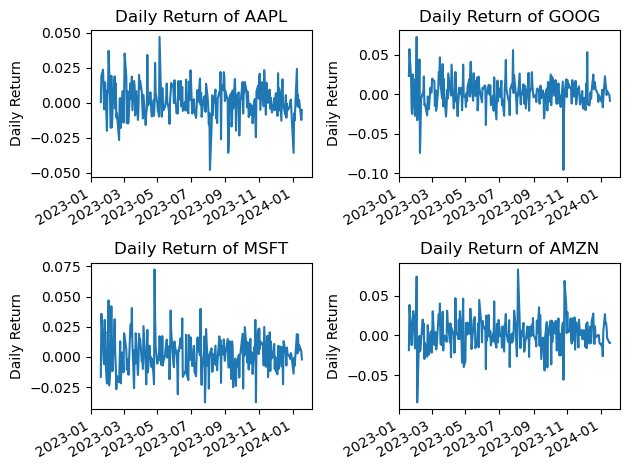

In [7]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(15, 12))
plt.subplots()

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].plot()
    plt.ylabel('Daily Return')
    plt.xlabel(None)
    plt.title(f"Daily Return of {tech_list[i - 1]}")
    
plt.tight_layout()

/tmp/ipykernel_32/1086156345.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


<Figure size 1500x1200 with 0 Axes>

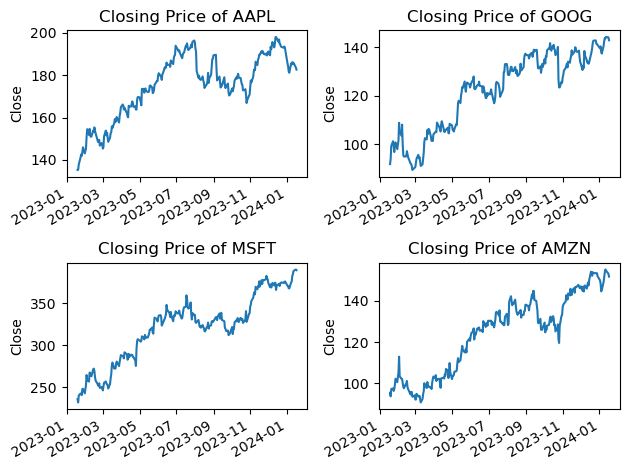

In [8]:
plt.figure(figsize=(15, 12))
plt.subplots()

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [9]:
##This is an example:
##df['Open:30 days rolling']=df['Open'].rolling(window=10, min_periods=1).mean()

# **What is Simple Moving Average (SMA):**

A Simple Moving Average is the average (mean) of a set of data points within a specified rolling window or time period. It is called "simple" because it gives equal weight to all data points within the window. The formula for calculating the SMA for a time series dataset is straightforward:

$$SMA_t = \frac{X_{t-1} + X_{t-2} + \ldots + X_{t-n}}{n}$$

Where:
- $SMA_t$ is the Simple Moving Average at time $t$.
- $X_{t-1}, X_{t-2}, ......, X_{t-n}$ are the data points within the rolling window (typically, $n$ previous data points).
- $n$ is the number of data points included in the calculation (the window size).

<Figure size 1500x1200 with 0 Axes>

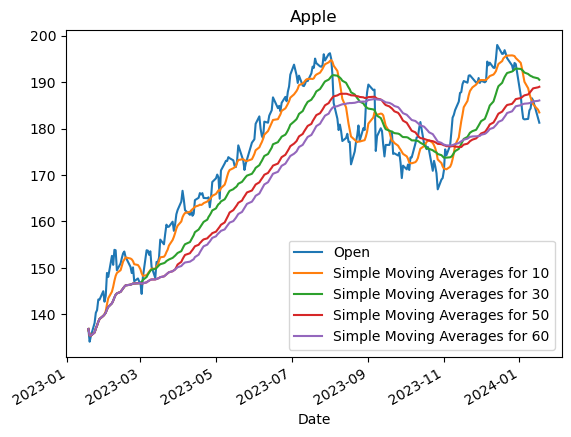

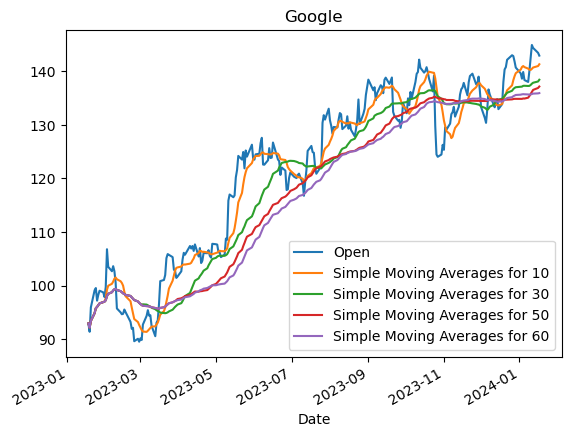

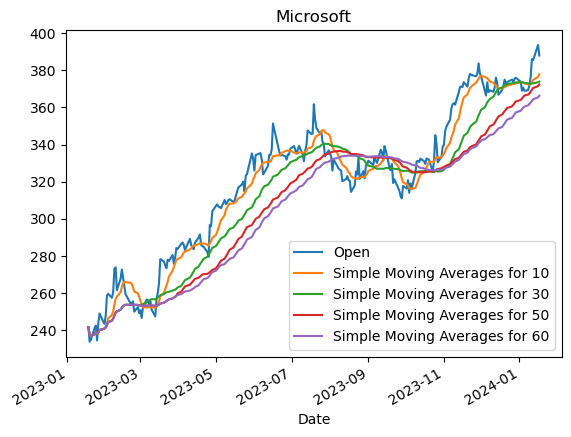

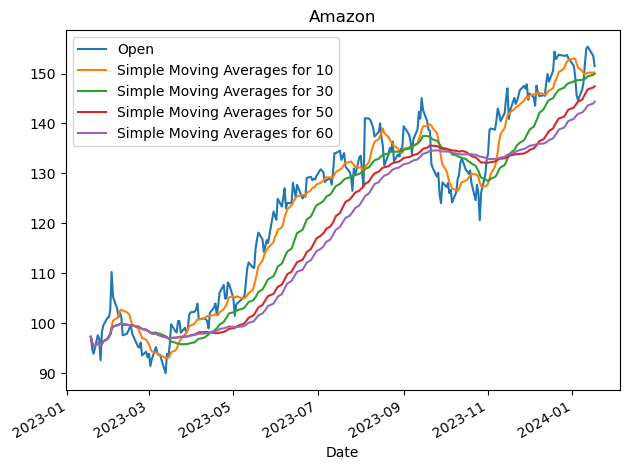

In [10]:
window=[10,30,50,60]

for ma_avg in window:
    for company in company_list:
        column=f"Simple Moving Averages for {ma_avg}"
        company[column]=company['Open'].rolling(ma_avg, min_periods=1).mean() #we need to use an aggregate function so here we are using average
        
plt.figure(figsize=(15, 12))

AAPL[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Apple')

GOOG[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Google')

MSFT[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Microsoft')

AMZN[['Open', 'Simple Moving Averages for 10', 'Simple Moving Averages for 30', 'Simple Moving Averages for 50', 'Simple Moving Averages for 60']].plot()
plt.title('Amazon')

plt.tight_layout()

# **What is Exponential Moving Average?**

**Exponential Moving Average (EMA)** is a commonly used statistical calculation for analyzing and forecasting time series data, particularly in finance and economics. It is a type of moving average that gives more weight to recent data points, making it more responsive to recent changes in the data compared to a simple moving average (SMA).

The formula for calculating the Exponential Moving Average (EMA) is as follows:

$$EMA_t = \alpha \cdot X_t + (1 - \alpha) \cdot EMA_{t-1}$$

Where:
- $EMA_t$ is the EMA at time $t$.
- $X_t$ is the value of the time series data at time $t$.
- $EMA_{t-1}$ is the EMA at the previous time period $(t-1)$.
- $\alpha$ is the smoothing factor, often referred to as the "weight" or "smoothing coefficient," and it is calculated using the formula: $\alpha = \frac{2}{N+1}$, where $N$ is the number of time periods for which you want to calculate the EMA. Alternatively, you can express $\alpha$ as a percentage by multiplying it by 100.

Here's how the EMA calculation works:
1. Start with an initial EMA value, often taken as the SMA for the first $N$ time periods.
2. For each subsequent time period, calculate the EMA using the formula above, where $\alpha$ gives more weight to the most recent data point, $X_t$, and $(1 - \alpha)$ gives weight to the previous EMA, $EMA_{t-1}$.

<Figure size 1500x1200 with 0 Axes>

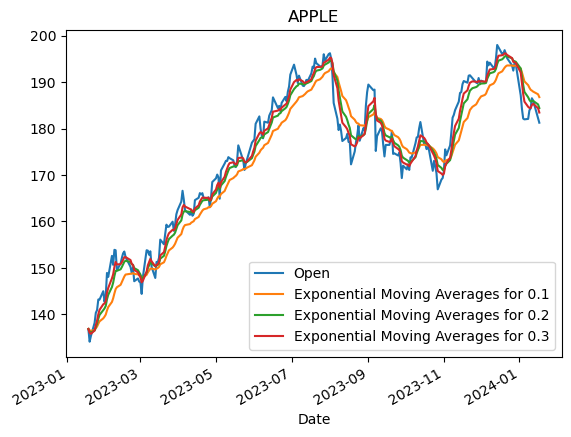

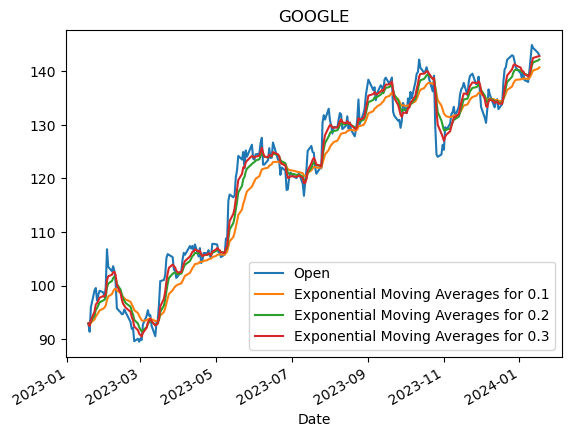

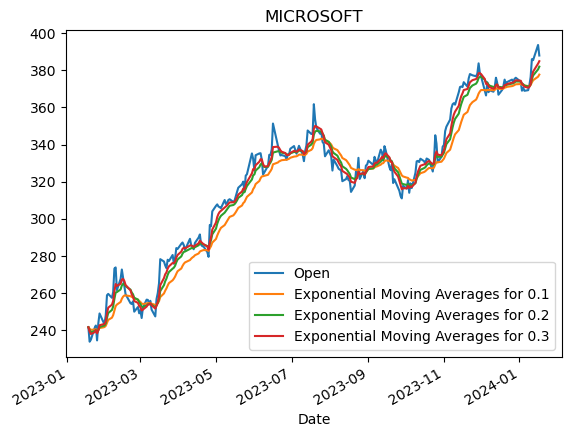

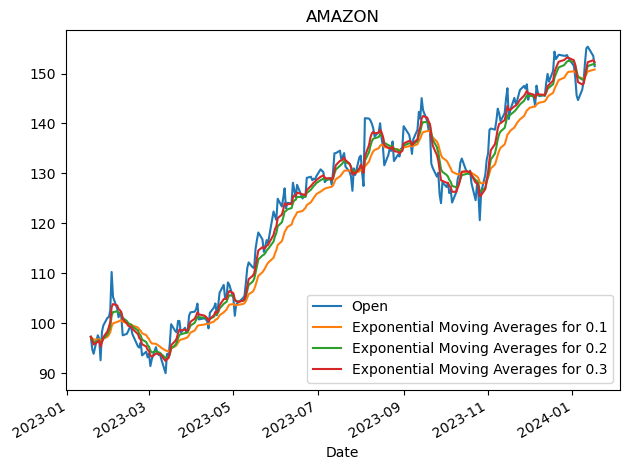

In [11]:
sf=[0.1,0.2,0.3]

for s_factor in sf:
    for company in company_list:
        column=f"Exponential Moving Averages for {s_factor}"
        company[column]=company['Open'].ewm(alpha=s_factor, adjust=False).mean() #we need to use an aggregate function so here we are using average
        
plt.figure(figsize=(15, 12))

AAPL[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('APPLE')

GOOG[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('GOOGLE')

MSFT[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('MICROSOFT')

AMZN[['Open', 'Exponential Moving Averages for 0.1','Exponential Moving Averages for 0.2', 'Exponential Moving Averages for 0.3']].plot()
plt.title('AMAZON')

plt.tight_layout()

In [12]:
list=['AAPL', 'GOOG', 'MSFT', 'AMZN']
closing=pdr

In [13]:
data = df.filter(['Close'])
#The values property returns all values in the DataFrame. 
#The return value is a 2-dimensional array with one array for each row.
new_df=data.values
training_data_len = int(np.ceil( len(new_df) * .95 ))

training_data_len

954

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(new_df)
scaled=scaler.fit_transform(new_df)

In [15]:
length=len(scaled)

In [16]:
train_data = scaled[0:training_data_len, :]

X_train = []
y_train = []


for i in range(60, length):  
    #to add the previous values to X_train of the prediction days 
    X_train.append(scaled[i - 60:i, 0])
    #adding current values to y train of the prediction day 
    y_train.append(scaled[i, 0])

# Convert the x_train and y_train lists to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential

In [18]:
run=wandb.init(project='predicting-stock-prices-from-lstm',
              config={
                  'learning_rate':0.005,
                  'batch_size':5,
                  'epochs': 8})

config=wandb.config
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
optimizer=tf.keras.optimizers.Adam(config.learning_rate)
model.compile(optimizer, loss='MSE')

wandb: Currently logged in as: dishaa_s. Use `wandb login --relogin` to force relogin


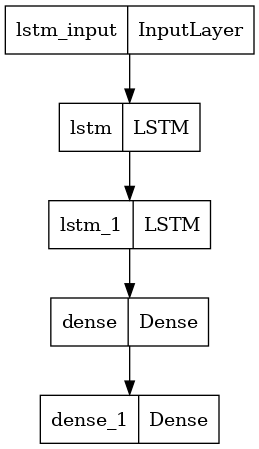

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [21]:
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint
wandb_callbacks = [
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="my_model_{epoch:02d}"),
    ]

In [22]:
model.fit(
    X_train,
    y_train,
    batch_size=config.batch_size, 
    epochs=config.epochs,
    callbacks=[wandb_callbacks],
)

Epoch 1/8
188/189 [============================>.] - ETA: 0s - loss: 0.0096

wandb: Adding directory to artifact (./my_model_01)... Done. 0.0s


189/189 [==============================] - 21s 94ms/step - loss: 0.0096
Epoch 2/8
189/189 [==============================] - ETA: 0s - loss: 0.0030

wandb: Adding directory to artifact (./my_model_02)... Done. 0.0s


189/189 [==============================] - 17s 88ms/step - loss: 0.0030
Epoch 3/8
188/189 [============================>.] - ETA: 0s - loss: 0.0039

wandb: Adding directory to artifact (./my_model_03)... Done. 0.0s


189/189 [==============================] - 17s 91ms/step - loss: 0.0039
Epoch 4/8
189/189 [==============================] - ETA: 0s - loss: 0.0022

wandb: Adding directory to artifact (./my_model_04)... Done. 0.0s


189/189 [==============================] - 17s 91ms/step - loss: 0.0022
Epoch 5/8
189/189 [==============================] - ETA: 0s - loss: 0.0025

wandb: Adding directory to artifact (./my_model_05)... Done. 0.0s


189/189 [==============================] - 17s 88ms/step - loss: 0.0025
Epoch 6/8
189/189 [==============================] - ETA: 0s - loss: 0.0025

wandb: Adding directory to artifact (./my_model_06)... Done. 0.0s


189/189 [==============================] - 18s 95ms/step - loss: 0.0025
Epoch 7/8
189/189 [==============================] - ETA: 0s - loss: 0.0028

wandb: Adding directory to artifact (./my_model_07)... Done. 0.0s


189/189 [==============================] - 18s 95ms/step - loss: 0.0028
Epoch 8/8
189/189 [==============================] - ETA: 0s - loss: 0.0030

wandb: Adding directory to artifact (./my_model_08)... Done. 0.0s


189/189 [==============================] - 17s 91ms/step - loss: 0.0030


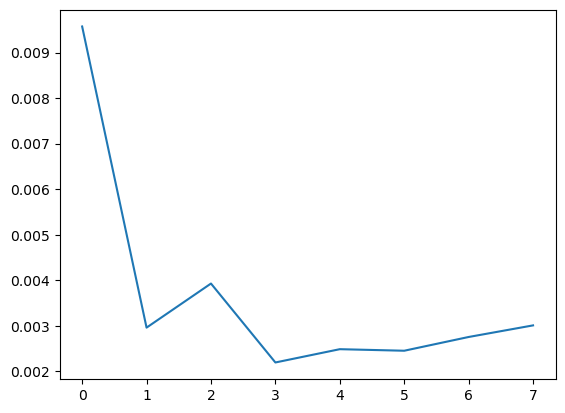

In [23]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
#Losses significantly decreased

In [24]:
test_data = scaled[training_data_len - 60: , :]
# Create the data sets x_test and y_test
X_test = []
y_test = new_df[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 19ms/step


1.9544563599316902

In [25]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

valid

/tmp/ipykernel_32/769977456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Close,Predictions
Date,,
2023-11-03,138.600006,137.470688
2023-11-06,139.740005,138.071503
2023-11-07,142.710007,138.998550
2023-11-08,142.080002,141.551682
2023-11-09,140.600006,141.924698
2023-11-10,143.559998,140.686554
2023-11-13,142.589996,142.472717
2023-11-14,145.800003,142.549652
2023-11-15,143.199997,144.836166


In [26]:
model.save('Stock_Prices.h5')